# World history through the lens of AI

In [11]:
import pandas as pd
import time, tqdm, re, requests, json, os
import numpy as np
import seaborn as sns
from collections import Counter, defaultdict

# Plotting
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
mpl.rcParams['font.family'] = 'monospace'
import seaborn as sns
import textwrap

import datetime
today = datetime.datetime.today().strftime('%Y_%m_%d')


## Evaluation

In [30]:
def get_pivot_data_for_top_events(df, model, n=3):
    df = df[df.model==model]
    
    # Get the events which occur at least 3 times for any language
    events_over_n = df.groupby(['model', 'lang', 'event']).filter(lambda x: len(x) >= n)['event'].unique()

    # Subset the DataFrame to include only those events
    filtered_df = df[df['event'].isin(events_over_n)]

    # Group by model and lang, and get the count for each event
    result_df = filtered_df.groupby(['model', 'lang', 'event']).size().reset_index(name='count')
    
    # Order of languages
    lang_order = ['English', 'French', 'Spanish', 'Chinese', 'Korean', 'Japanese']

    # Creating a pivot table
    pivot_df = result_df.pivot_table(values='count', index='event', columns='lang', fill_value=0)

    # Reindex the pivot table according to the specified language order and fill NaN with 0
    pivot_df = pivot_df.reindex(lang_order, axis=1).fillna(0)

    # Add a 'total' column with the sum of each row
    pivot_df['total'] = pivot_df.sum(axis=1)

    # Sort by the 'total' column, then drop it
    pivot_df = pivot_df.sort_values('total', ascending=False)
    pivot_df = pivot_df.drop(columns='total')
    
    return pivot_df

def get_pivot_data_across_models(df, n=5):
    # Get the events which occur at least 3 times for any language
    events_over_n = df.groupby(['model', 'event']).filter(lambda x: len(x) >= n)['event'].unique()

    # Subset the DataFrame to include only those events
    filtered_df = df[df['event'].isin(events_over_n)]

    # Group by model and lang, and get the count for each event
    result_df = filtered_df.groupby(['model', 'event']).size().reset_index(name='count')

    # # Creating a pivot table
    pivot_df = result_df.pivot_table(values='count', index='event', columns='model', fill_value=0)

    model_order = ['gpt-4', 'anthropic', 'falcon 40b']
    # # Reindex the pivot table according to the specified language order and fill NaN with 0
    pivot_df = pivot_df.reindex(model_order, axis=1).fillna(0)

    # # Add a 'total' column with the sum of each row
    pivot_df['total'] = pivot_df.sum(axis=1)

    # # Sort by the 'total' column, then drop it
    pivot_df = pivot_df.sort_values('total', ascending=False)
    pivot_df = pivot_df.drop(columns='total')
    pivot_df.columns = ['GPT-4', 'Claude', 'Falcon']
    return pivot_df

def make_events_heatmap(data, cmap, figsize=(8,4)):
    plt.figure(figsize=figsize)
    sns.heatmap(data, annot=True, cmap=cmap, cbar=False)

    plt.tick_params(axis='both', which='both', length=0)

    plt.ylabel('')
    plt.xlabel('')
    plt.yticks([i+0.5 for i in range(len(data.index))], [textwrap.fill(i, 30) for i in data.index])
    
    return plt

In [12]:
gpt_df = pd.read_csv('llm-outputs/gpt4-2023_06_28.csv')
anthropic_df = pd.read_csv('llm-outputs/anthropic-2023_06_27.csv')
falcon_df = pd.read_csv('llm-outputs/falcon-manual-2023_06_28.csv')
df = pd.concat([gpt_df, anthropic_df, falcon_df])
df = df[df.year.isin([610, 1848, 1910])]

year610  = df[df.year==610].reset_index(drop=True)
year1848 = df[df.year==1848].reset_index(drop=True)
year1910 = df[df.year==1910].reset_index(drop=True)

# 610

In [8]:
with open(f'data/events_610_cleaned.json', 'r') as f:
    events_610 = json.load(f)
events_610_df = pd.DataFrame(events_610)
pivot_610_gpt4 = get_pivot_data_for_top_events(events_610_df, 'gpt-4', n=5)
pivot_610_anthropic = get_pivot_data_for_top_events(events_610_df, 'anthropic', n=5)
pivot_610_falcon = get_pivot_data_for_top_events(events_610_df, 'falcon 40b', n=5)

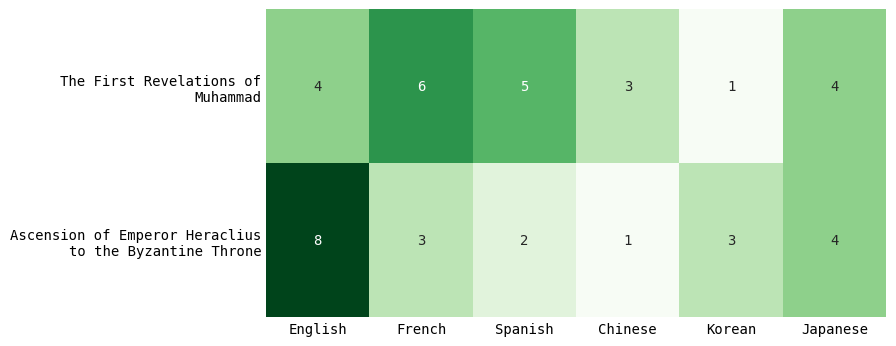

In [26]:
plt = make_events_heatmap(pivot_610_gpt4, 'Greens')

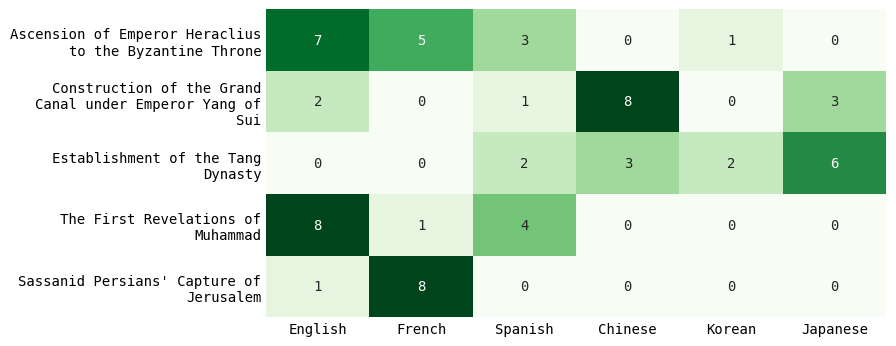

In [25]:
plt = make_events_heatmap(pivot_610_anthropic, 'Greens')

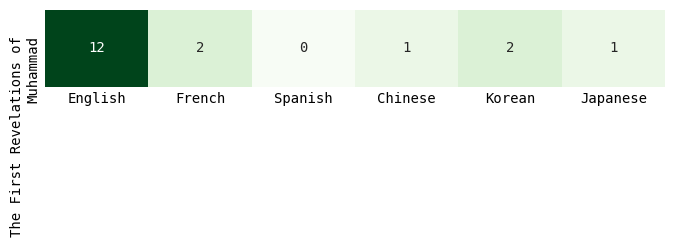

In [24]:
plt = make_events_heatmap(pivot_610_falcon, 'Greens', figsize=(8,1))

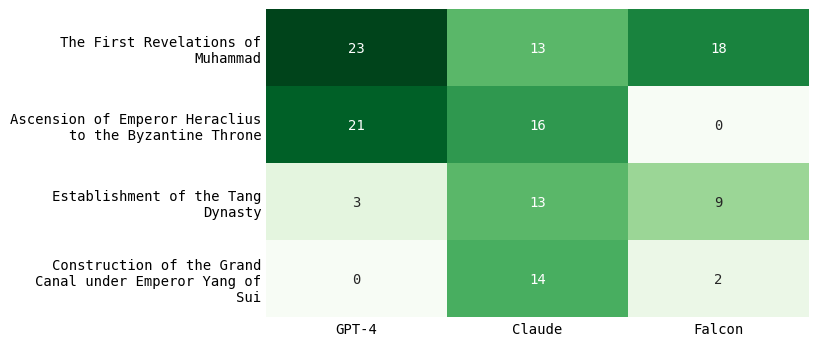

In [31]:
# Comparing models, with all languages combined
plt = make_events_heatmap(get_pivot_data_across_models(events_610_df, n=10), 'Greens', figsize=(7,4))
plt.show()

# 1848

In [32]:
with open(f'data/events_1848_cleaned.json', 'r') as f:
    events_1848 = json.load(f)
events_1848_df = pd.DataFrame(events_1848)
pivot_1848_gpt4 = get_pivot_data_for_top_events(events_1848_df, 'gpt-4', n=5)
pivot_1848_anthropic = get_pivot_data_for_top_events(events_1848_df, 'anthropic', n=5)
pivot_1848_falcon = get_pivot_data_for_top_events(events_1848_df, 'falcon 40b', n=5)


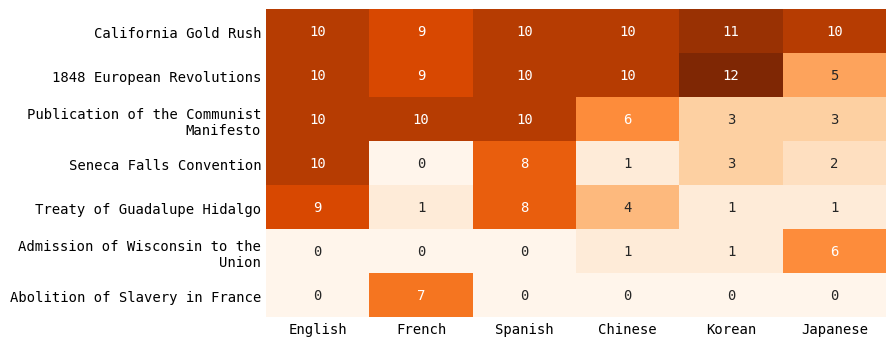

In [33]:
plt = make_events_heatmap(pivot_1848_gpt4, 'Oranges')

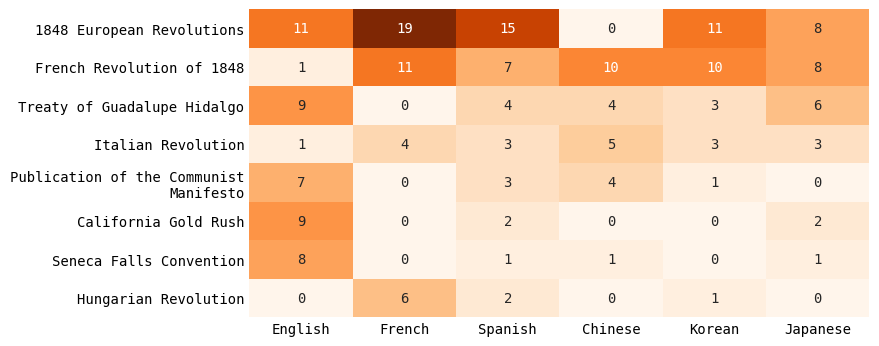

In [34]:
plt = make_events_heatmap(pivot_1848_anthropic, 'Oranges')

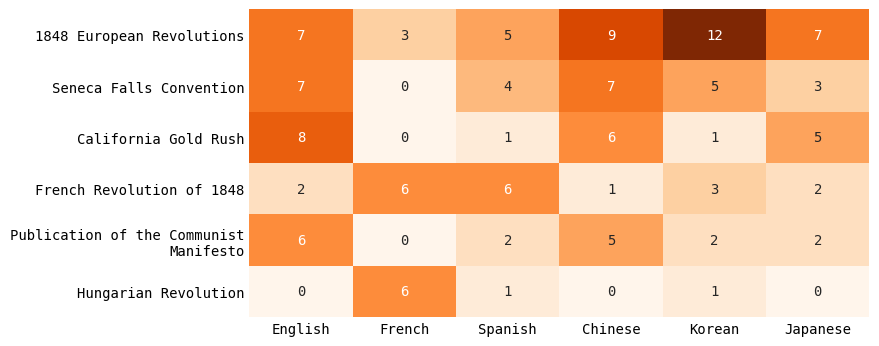

In [35]:
plt = make_events_heatmap(pivot_1848_falcon, 'Oranges')

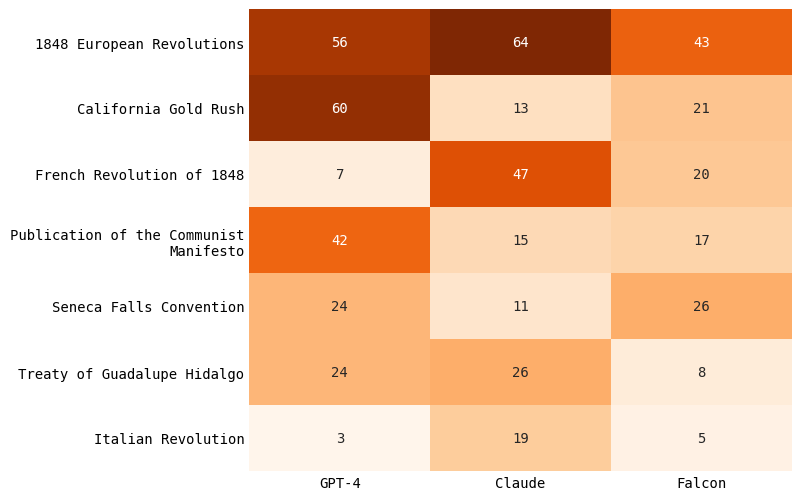

In [37]:
# Comparing models, all langs combined
plt = make_events_heatmap(get_pivot_data_across_models(events_1848_df, n=10), 'Oranges', figsize=(7,6))

#### For 1848, it's additionally interesting to look at which revolutions each language talked about

In [ ]:
 pivot_df = result_df.pivot_table(values='count', index='event', columns='lang', fill_value=0)

In [1168]:
events_1848_revolutions = events_1848_df[events_1848_df.event.str.contains('Revolution')]
pivot_1848_rev_gpt4 = get_pivot_data_for_top_events(events_1848_revolutions, 'gpt-4', n=2)
pivot_1848_rev_anthropic = get_pivot_data_for_top_events(events_1848_revolutions, 'anthropic', n=2)

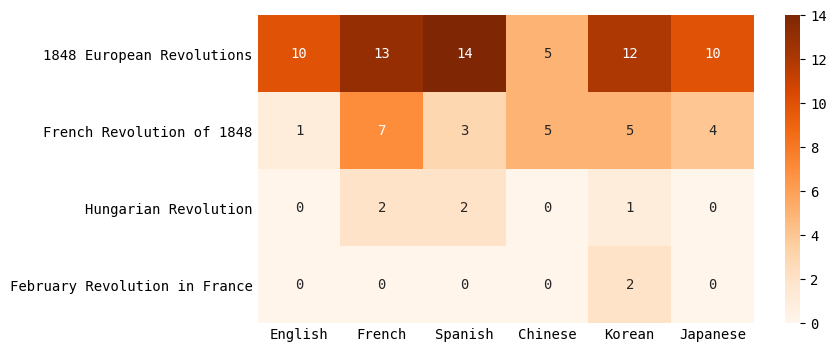

In [1169]:
make_events_heatmap(pivot_1848_rev_gpt4, 'Oranges')

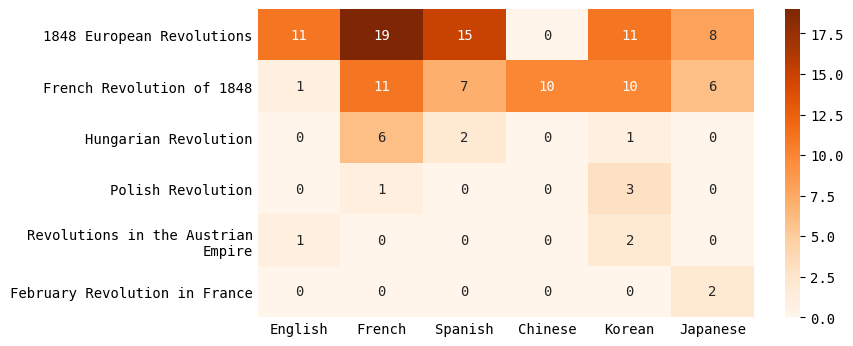

In [1170]:
make_events_heatmap(pivot_1848_rev_anthropic, 'Oranges')

# 1910

In [38]:
with open(f'data/events_1910_cleaned.json', 'r') as f:
    events_1910 = json.load(f)
events_1910_df = pd.DataFrame(events_1910)
pivot_1910_gpt4 = get_pivot_data_for_top_events(events_1910_df, 'gpt-4', n=5)
pivot_1910_anthropic = get_pivot_data_for_top_events(events_1910_df, 'anthropic', n=5)
pivot_1910_falcon = get_pivot_data_for_top_events(events_1910_df, 'falcon 40b', n=5)


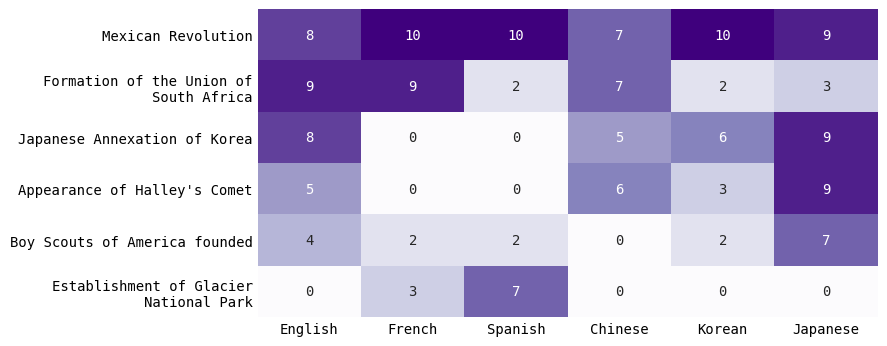

In [39]:
plt = make_events_heatmap(pivot_1910_gpt4, 'Purples')

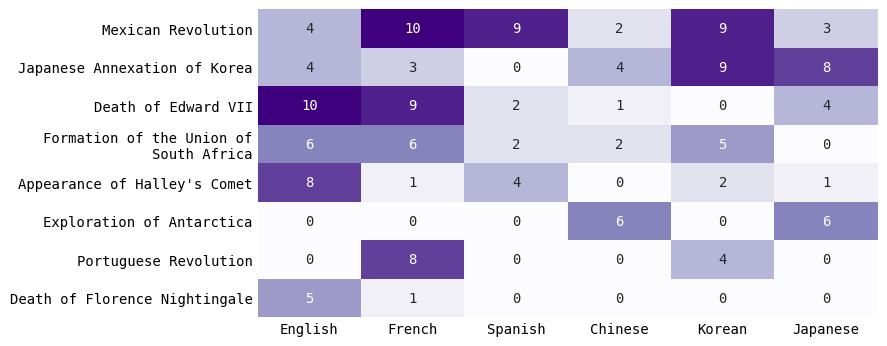

In [41]:
plt = make_events_heatmap(pivot_1910_anthropic, 'Purples')

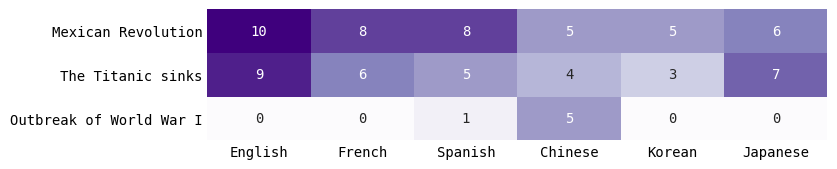

In [42]:
plt = make_events_heatmap(pivot_1910_falcon, 'Purples', figsize=(8,1.7))

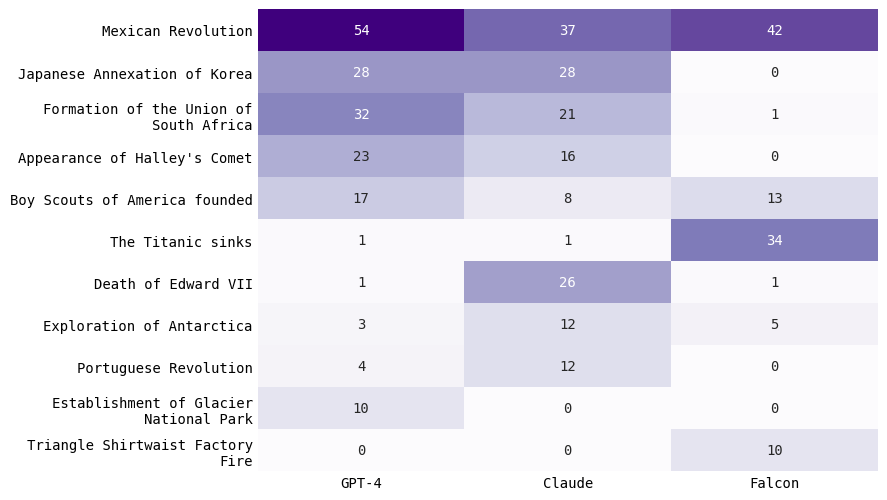

In [43]:
# comparing models regardless of language
plt = make_events_heatmap(get_pivot_data_across_models(events_1910_df, n=10), 'Purples', figsize=(8,6))

# Correlations

In [44]:
import pandas as pd

def generate_language_correlation_matrix(df, model=None):
    unique_languages = ['English', 'French', 'Spanish', 'Chinese', 'Korean', 'Japanese']

    correlation_matrix = pd.DataFrame(index=unique_languages, columns=unique_languages)

    if model:
        df=df[df.model==model]

    for language1 in unique_languages:
        for language2 in unique_languages:
            if language1 == language2:
                correlation_matrix.loc[language1, language2] = 1.0
            else:
                similarities = []
                events_lang1 = df[df['lang'] == language1]['event'].values
                events_lang2 = df[df['lang'] == language2]['event'].values

                event_strings_lang1 = [event.replace(" ", "_") for event in events_lang1]
                event_strings_lang2 = [event.replace(" ", "_") for event in events_lang2]

                similarity = cosine_similarity(events_lang1, events_lang2)
                similarities.append(similarity)

                correlation_matrix.loc[language1, language2] = sum(similarities) / len(similarities)

    return correlation_matrix.astype(float)



def generate_model_correlation_matrix(df, language=None):
    unique_models = df['model'].unique()
    correlation_matrix = pd.DataFrame(index=unique_models, columns=unique_models)
    

    if language:
        df=df[df.lang==language]

    for model1 in unique_models:
        for model2 in unique_models:
            if model1 == model2:
                correlation_matrix.loc[model1, model2] = 1.0
            else:
                similarities = []
                events_model1 = df[df['model'] == model1]['event'].values
                events_model2 = df[df['model'] == model2]['event'].values

                event_strings_model1 = [event.replace(" ", "_") for event in events_model1]
                event_strings_model2 = [event.replace(" ", "_") for event in events_model2]

                similarity = cosine_similarity(events_model1, events_model2)
                similarities.append(similarity)

                correlation_matrix.loc[model1, model2] = sum(similarities) / len(similarities)

    return correlation_matrix.astype(float)

import math
def cosine_similarity(list1, list2):
    # Process lists to handle whitespaces
    list1 = [re.sub(' +', ' ', x.strip()) for x in list1]
    list2 = [re.sub(' +', ' ', x.strip()) for x in list2]
    
    # Count frequency of each word in the lists
    counter1, counter2 = Counter(list1), Counter(list2)
    
    # Get the set of all words
    words = set(counter1.keys()).union(set(counter2.keys()))
    
    # Calculate dot product
    dot_product = sum(counter1.get(word, 0) * counter2.get(word, 0) for word in words)
    
    # Calculate magnitudes
    mag1 = math.sqrt(sum(val ** 2 for val in counter1.values()))
    mag2 = math.sqrt(sum(val ** 2 for val in counter2.values()))
    
    # Calculate cosine similarity and return it
    return dot_product / (mag1 * mag2)

In [45]:
events_all_years = pd.concat([events_610_df, events_1848_df, events_1910_df])


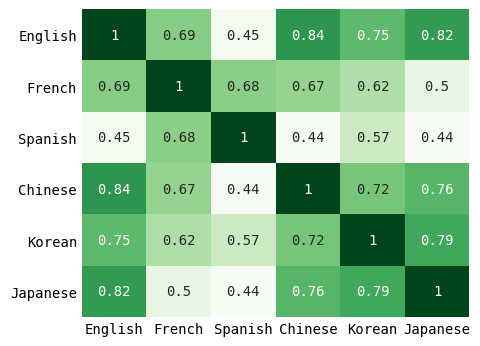

In [47]:
# In 1910, how do the languages compare for GPT-4
c = generate_language_correlation_matrix(events_1910_df, 'gpt-4')
plt = make_events_heatmap(c, 'Greens', figsize=(5,4))

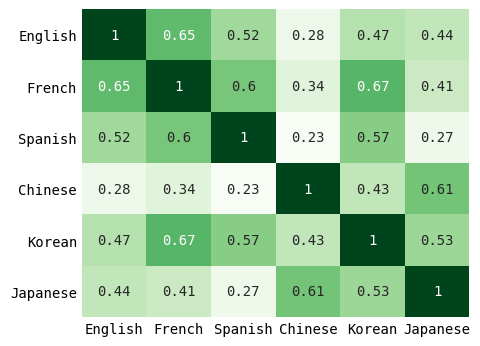

In [48]:
# In 1910, how do the languages compare for Anthropic
c = generate_language_correlation_matrix(events_1910_df, 'anthropic')
plt = make_events_heatmap(c, 'Greens', figsize=(5,4))


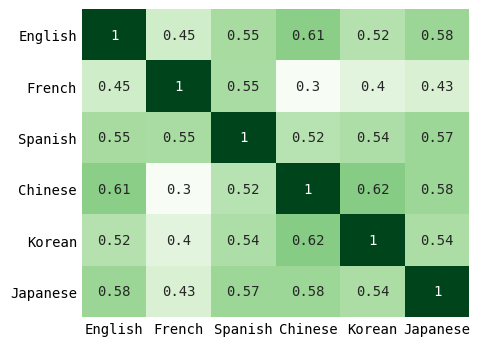

In [49]:
# In 1910, how do the languages compare for Falcon
c = generate_language_correlation_matrix(events_all_years, 'falcon 40b')
plt = make_events_heatmap(c, 'Greens', figsize=(5,4))


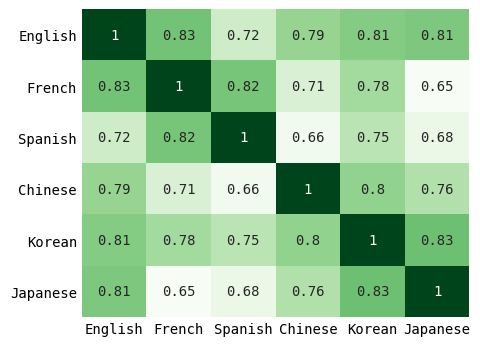

In [51]:
# In 1910, how do the languages compare for all models regardless of model
c = generate_language_correlation_matrix(events_1910_df)
plt = make_events_heatmap(c, 'Greens', figsize=(5,4))


## Correlation of models for each language

In [52]:
def generate_corr_matrix_for_all_langs(events_df):
    fig, axes = plt.subplots(2, 3, figsize=(14,9))
    axes = [i for sublist in axes for i in sublist]

    for ax, lang in zip(axes, 
                        ['English', 'French', 'Spanish', 'Chinese', 'Korean', 'Japanese']):
        c=generate_model_correlation_matrix(events_df, lang)

        sns.heatmap(data=c, annot=True, cmap='Blues', ax=ax, cbar=None, square=True)

        ax.set_xticklabels(['GPT-4', 'Claude', 'Falcon'])
        ax.set_yticklabels(['GPT-4', 'Claude', 'Falcon'])
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_title(lang, size=14)

    fig.tight_layout(pad=3)

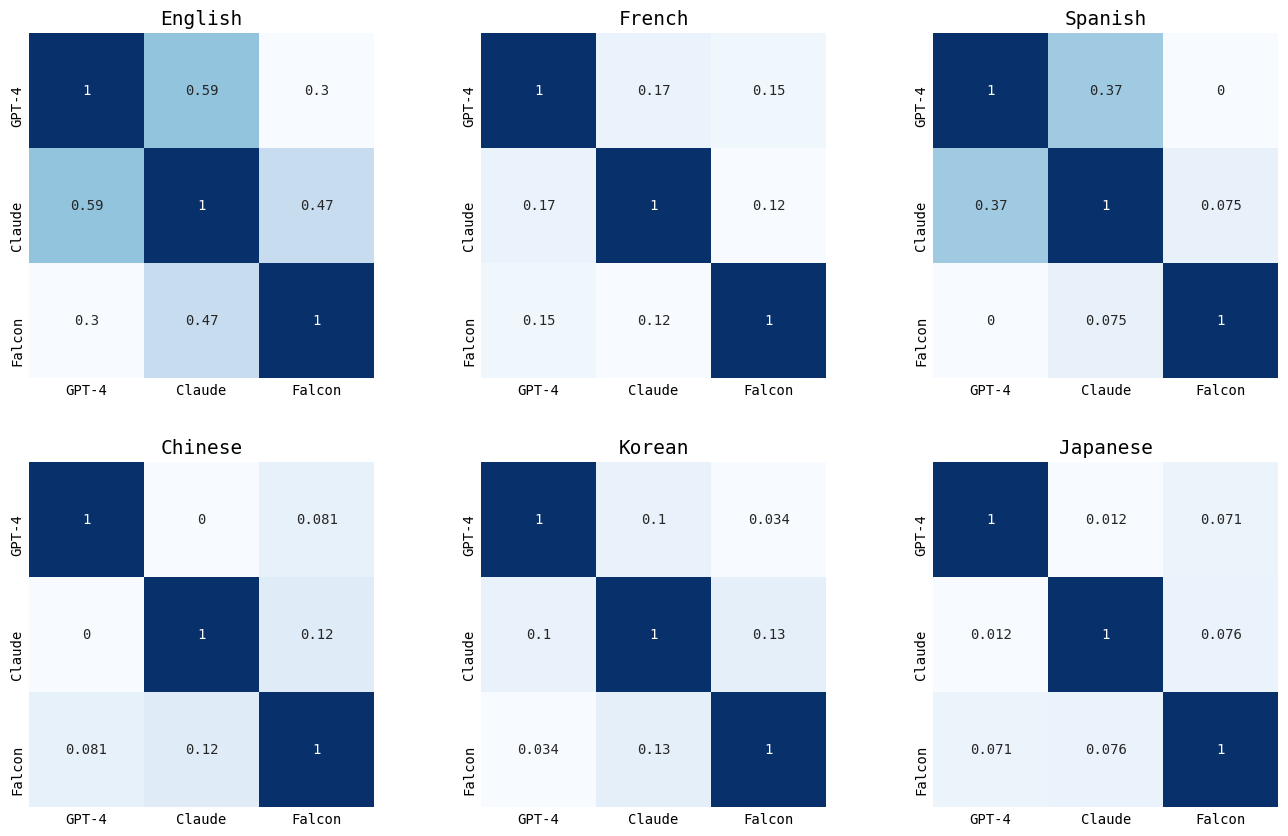

In [53]:
generate_corr_matrix_for_all_langs(events_610_df)

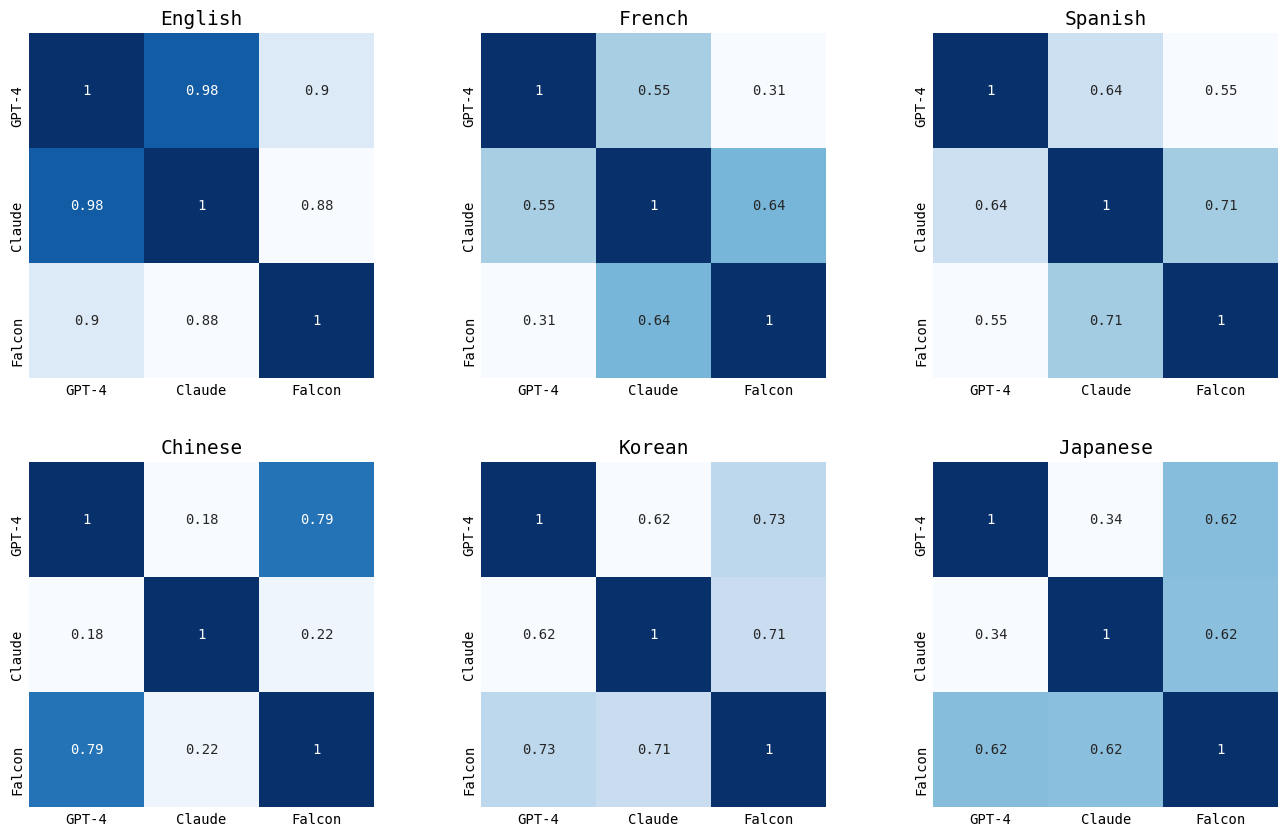

In [54]:
generate_corr_matrix_for_all_langs(events_1848_df)

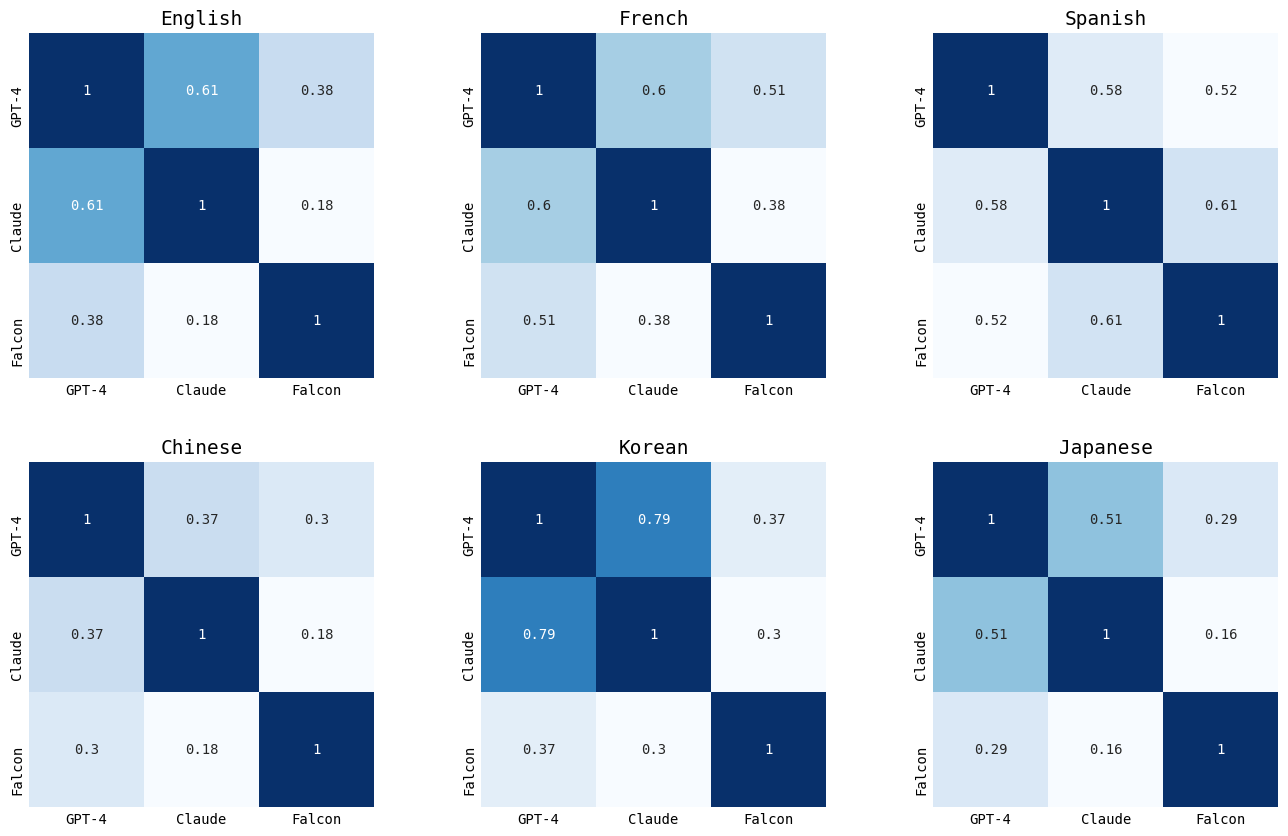

In [55]:
generate_corr_matrix_for_all_langs(events_1910_df)

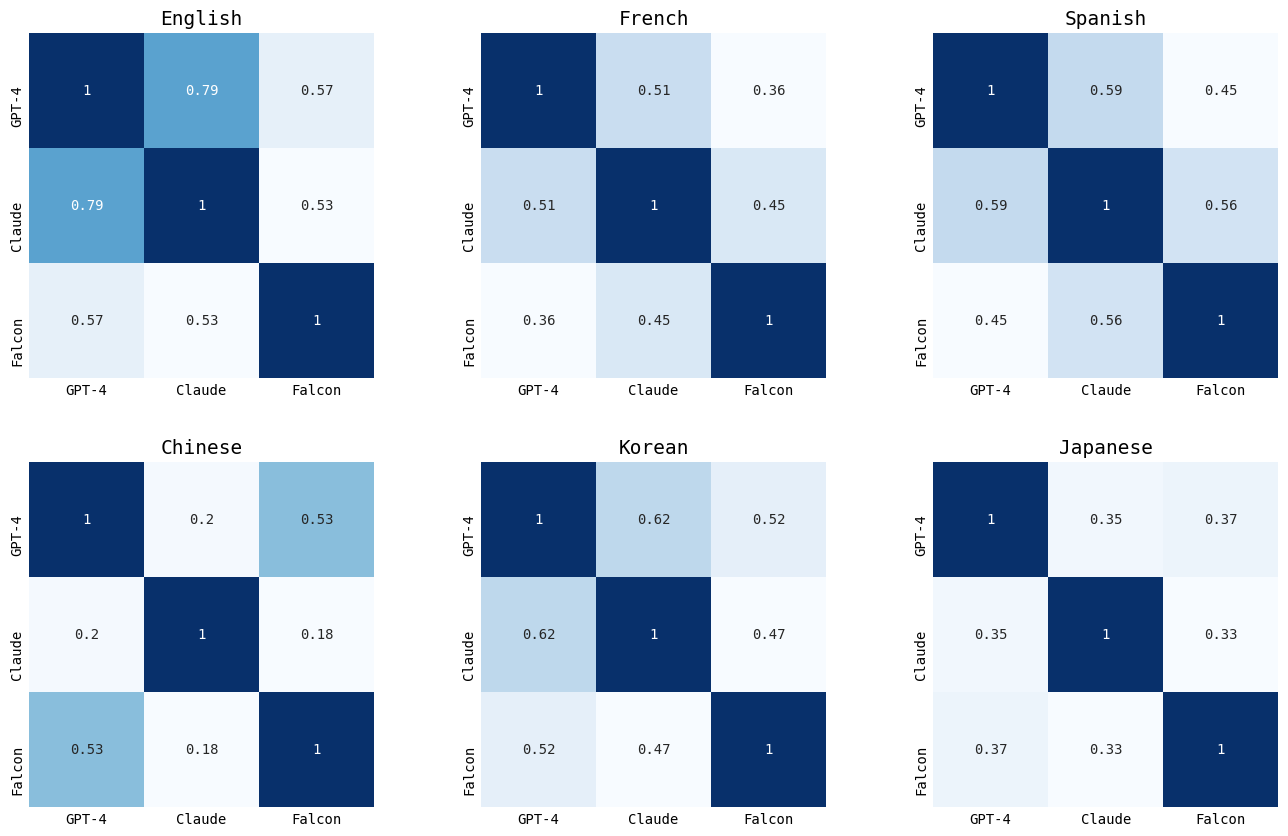

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(14,9))
axes = [i for sublist in axes for i in sublist]

for ax, lang in zip(axes, 
                    ['English', 'French', 'Spanish', 'Chinese', 'Korean', 'Japanese']):
    c=generate_model_correlation_matrix(events_all_years, lang)
    
    sns.heatmap(data=c, annot=True, cmap='Blues', ax=ax, cbar=None, square=True)
    
    ax.set_xticklabels(['GPT-4', 'Claude', 'Falcon'])
    ax.set_yticklabels(['GPT-4', 'Claude', 'Falcon'])
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_title(lang, size=14)
    
fig.tight_layout(pad=3)

## Correlation, combining all languages

Text(0.5, 1.0, 'All languages aggregated')

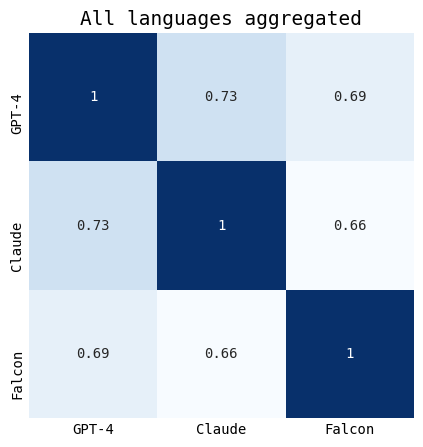

In [57]:
# Correlation combining all of the languages

fig, ax = plt.subplots(1,1, figsize=(5,5))
c=generate_model_correlation_matrix(events_all_years)
sns.heatmap(data=c, annot=True, cmap='Blues', ax=ax, cbar=None, square=True)

ax.set_xticklabels(['GPT-4', 'Claude', 'Falcon'])
ax.set_yticklabels(['GPT-4', 'Claude', 'Falcon'])
ax.tick_params(axis='both', which='both', length=0)
ax.set_title('All languages aggregated', size=14)



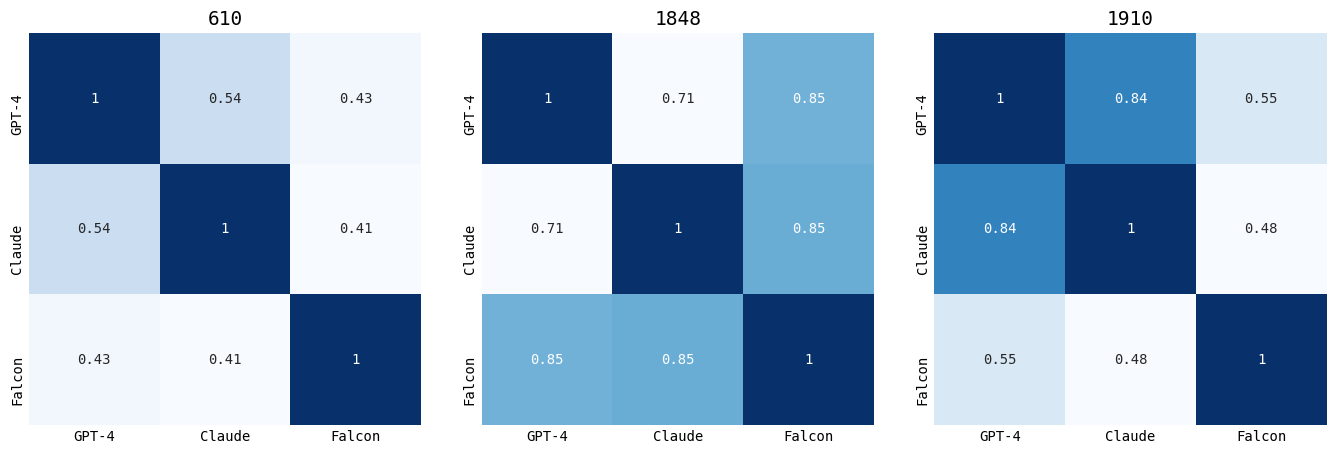

In [58]:
# Correlation combining all of the languages

fig, axes = plt.subplots(1,3, figsize=(14,5))
for e_df, year, ax in zip([events_610_df, events_1848_df, events_1910_df], [610, 1848, 1910], axes):
    c=generate_model_correlation_matrix(e_df)
    sns.heatmap(data=c, annot=True, cmap='Blues', ax=ax, cbar=None, square=True)

    ax.set_xticklabels(['GPT-4', 'Claude', 'Falcon'])
    ax.set_yticklabels(['GPT-4', 'Claude', 'Falcon'])
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_title(year, size=14)

fig.tight_layout(pad=3)

In [ ]:
- so much sui yangdi lolol

In [923]:
with open('year610-anthropic-event2eventname.json', 'r') as f:
    event2eventname = json.load(f)

In [927]:
year610_anthropic = anthropic_df[anthropic_df.year==610]

In [936]:
events_610 = []

for i, row in year610_anthropic.iterrows():
    for num in range(1,8):
        if not pd.isnull(row[f'response{num}']):
            clean_text = re.sub(r'^\d+\.\s*', '', row[f'response{num}'])
            clean_text = clean_text.strip()  
            clean_text = re.sub(r'^\d+\.\s*', '', clean_text)
            clean_text = clean_text.strip('.')
            if '610' in clean_text: continue
            clean_text = event2eventname[clean_text]
            
            if 'Founding of Sui Dynasty' in clean_text:
                clean_text = 'Founding of Sui Dynasty'
            elif 'Founding of Tang Dynasty' in clean_text:
                clean_text = 'Founding of Tang Dynasty'
            elif 'Sassanid' in clean_text and 'Byzantine' in clean_text:
                clean_text = 'Byzantine-Sassanid War'
            elif 'Death of Emperor Sui' in clean_text or 'End of Sui Yangdi' in clean_text:
                clean_text = 'Death of Emperor Sui Yangdi of Sui Dynasty'
                
            events_610.append({
                'lang': row['language'],
                'model': row['model'],
                'event': clean_text
            })
            


In [937]:
Counter([i['event'] for i in events_610]).most_common()

[('Ascension of Emperor Heraclius I', 11),
 ('Founding of Tang Dynasty', 9),
 ('Founding of Islam', 7),
 ("Muhammad's First Revelation from Archangel Gabriel", 6),
 ('Byzantine-Sassanid War', 5),
 ('Founding of Sui Dynasty', 5),
 ('Death of Byzantine Emperor Phocas', 5),
 ('Pope Boniface IV Consecrates Pantheon to Christian Martyrs', 4),
 ("Sui Yangdi's Construction of the Grand Canal", 4),
 ('Sassanid Conquest of Jerusalem', 4),
 ('End of Sui Dynasty', 3),
 ('Death of Pope Boniface IV', 3),
 ("Sui Yangdi's Invasion of Goguryeo", 3),
 ('Death of Emperor Sui Yangdi of Sui Dynasty', 3),
 ("Pepin of Landen's Appointment as Mayor of the Palace in Austrasia", 2),
 ("Yu Gwan-sun's Uprising", 2),
 ('Sui Yangdi Sends Envoys to India for Buddhist Scriptures', 2),
 ("Beginning of Construction of Sui Dynasty's Grand Canal", 2),
 ('Beginning of Muslim Expansion in Arabian Peninsula', 2),
 ('Death of Saint Columbanus', 1),
 ('Visigothic Victory Over Byzantine Army under King Gundemar', 1),
 ('Ascen

### Load in normalized data

In [173]:
cleaned = []
english_other = []
nonenglish_other = []

for i, row in year1910.iterrows():
    lang_code = lang2code[row['language']]
    
    for num in range(1,6):
        clean_text = re.sub(r'^\d+\.\s', '', row[f'response{num}'])
        clean_text = clean_text.strip()
        clean_title = find_english_title(clean_text, lang_code)
        
        if clean_title not in ['NA', 'Page does not exist']:
            cleaned.append(clean_title)
        else:
            if lang_code=='en':
                english_other.append(clean_text)
            else:
                nonenglish_other.append(clean_text)


KeyboardInterrupt: 

### Manual analysis?

#### GPT-4 vs Anthropic (just English in 1910) prioritizes very different "top events in history"
- GPT-4 - Mexican Revolution, Union of South Africa, and Japan annexing Korea show up all 5 times - pretty consistently
- Claude mentions death of King Edward VII (which GPT-4 does not mention once) and Halley's Comet (which GPT-4 only mentions once) 5 times
- Claude only mentions Korea annexation once... Focuses more on the death of important people like Florence, Mark, and Leo

In [364]:
Counter([i['event'] for i in all_events if i['model']=='gpt-4' and i['lang']=='English']).most_common()

[('Mexican Revolution', 5),
 ('Union of South Africa formation', 5),
 ('Japan annexes Korea', 5),
 ('Mann-Elkins Act (U.S.)', 2),
 ('Portuguese Revolution', 2),
 ('French troops occupy Morocco', 1),
 ("Halley's Comet", 1),
 ('US Patent for Inventor Thomas Edison\'s "talking motion pictures"', 1),
 ('Great Paris Flood', 1),
 ('Boy Scouts of America founded', 1),
 ('Earthquake in Colombia (Bogota)', 1)]

In [366]:
Counter([i['event'] for i in all_events if i['model']=='anthropic' and i['lang']=='English']).most_common()

[('Death of King Edward VII', 5),
 ("Halley's Comet", 5),
 ('Death of Florence Nightingale', 3),
 ('Union of South Africa formation', 3),
 ('Mexican Revolution', 2),
 ('Death of Mark Twain', 2),
 ('Death of Leo Tolstoy', 2),
 ('Japan annexes Korea', 1),
 ('First public radio broadcast', 1),
 ('Formation of the NAACP', 1)]

#### GPT-4 vs Anthropic in Korean
- To make matters even more confusing, Claude's top historical events in _Korean_ match GPT-4's top historical events in _English_. It is very confusing. As well as a bunhc of random things that don't seem to belogn for Korean, like Boys Scouts
- GPT-4 in Korean, actually only mentioned Japan annexing Korea once??
- GPT-4 in Korean, actually mentioned a lot of super random shit that did not happen
  - like wtf is Thomas Massey's Declaration of Cuban Independence, or India-Anzacs Conspiracy, or 헤이그 천문대 견해 (Hale's Observations at Mount Wilson Observatory) literally not even a correct transliteration

In [368]:
Counter([i['event'] for i in all_events if i['model']=='anthropic' and i['lang']=='Korean']).most_common()

[('Mexican Revolution', 5),
 ('Japan annexes Korea', 4),
 ('Union of South Africa formation', 2),
 ('1910년 중대한 역사적 사건 다섯 가지:', 1),
 ('Russo-Japanese War', 1),
 ('남섬사건', 1),
 ('통감부 철폐', 1),
 ('조선총독부 수립', 1),
 ('1910년에 일어난 중대한 5가지 역사적 사건들:', 1),
 ('Portuguese Revolution', 1),
 ('영국의 헌법개정', 1),
 ('1910년에 있었던 중요한 역사적 사건 다섯 가지:', 1),
 ('러시아 제국의 종말', 1),
 ('제1차 중동전쟁', 1),
 ('Philippine Revolution', 1),
 ('1910년 주요 역사적 사건 다섯 가지:', 1),
 ('메리디언 선언 (포르투갈 공화국 선언)', 1),
 ('Boy Scouts of America founded', 1),
 ("Halley's Comet", 1),
 ('1910년에 일어난 중요한 5가지 역사적 사건:', 1),
 ('보이콧 운동 (인도)', 1),
 ('에콰도르와 베네수엘라의 독립', 1)]

In [369]:
Counter([i['event'] for i in all_events if i['model']=='gpt-4' and i['lang']=='Korean']).most_common()

[('Mexican Revolution', 5),
 ('Japan annexes Korea', 1),
 ('해그 영구 중재법 판결 첫 번째 사례 (First Case Settled by Permanent Court of Arbitration at The Hague)',
  1),
 ('영국과 한국의 조약 체결 (Britain and Korea sign a treaty)', 1),
 ('아리조나와 하와이 주착 법안 통과 (US Statehood for Arizona and Hawaii)', 1),
 ('애들러의 이론회철투쟁론 발표 (Introduction of Alfred Adler\'s theory of "struggling" or "fighting")',
  1),
 ("한인 독립운동의 무장투쟁 (The Korean Independence Movement's armed struggle)", 1),
 ('헤일리요식당에서 안토니오말라토와 마누엘폰세다새레스의 대결 (Conflict between Antonio Maura and Manuel Ponce de León at the Heliogabalus restaurant)',
  1),
 ("토마스 매스 그라디스의 쿠바 독립 선언 (Thomas Massey's Declaration of Cuban Independence)",
  1),
 ("헤이그 천문대 견해 (Hale's Observations at Mount Wilson Observatory)", 1),
 ("토마스 에디슨이 인공 진공관 발명 (Thomas Edison's invention of the Artificial Vacuum Tube)",
  1),
 ('인도-앙증맬라즈 음모 (India-Anzacs Conspiracy)', 1),
 ("유고슬라비아 왕국의 세례 (Kingdom of Yugoslavia's renaming)", 1),
 ('헬싱포르스 선언 (Helsinki Manifesto)', 1),
 ('이탈리아가 트리폴리탄니아에 침공 (Italia

#### French
- Anthropic - in french we're topped with the Portuguese Revolution. Why in French tho? https://en.wikipedia.org/wiki/5_October_1910_revolution
- GPT-4 seems like Mexican Revolution really is the top historical event across all langauges lol
  - somehow cares about Glacier National Park idk why
  - + does care about Paris Flood, which seems like a local event

In [370]:
Counter([i['event'] for i in all_events if i['model']=='anthropic' and i['lang']=='French']).most_common()

[('Portuguese Revolution', 5),
 ('Mexican Revolution', 4),
 ('Death of King Edward VII', 4),
 ('Japan annexes Korea', 3),
 ('Union of South Africa formation', 2),
 ('Fondation de la Fédération Aérienne Internationale', 1),
 ('Révolution du Xinhai en Chine', 1),
 ('Décès de Florence Nightingale', 1),
 ('Great Paris Flood', 1),
 ("Ballon dirigeable “America” traverse l'Atlantique", 1),
 ("Accord sur la Namibie entre le Royaume-Uni et l'Allemagne", 1),
 ('Séisme de Chine de 1910', 1)]

In [371]:
Counter([i['event'] for i in all_events if i['model']=='gpt-4' and i['lang']=='French']).most_common()

[('Mexican Revolution', 5),
 ('Union of South Africa formation', 4),
 ('Great Paris Flood', 2),
 ('Creation of Glacier National Park in the US', 2),
 ('Inauguration de la Chambre des communes canadienne', 1),
 ('Fondation du Parti nationaliste basque', 1),
 ('Incident de Wahabi en Arabie saoudite', 1),
 ('Incident de la légation japonaise en Chine', 1),
 ('Incendie de la Ville de Bangor au Maine (États-Unis)', 1),
 ('Incendie de la rivière Cuyahoga', 1),
 ('Les premiers vols postaux aériens en Inde', 1),
 ('Foundation of the Republic of China', 1),
 ('Mann-Elkins Act (U.S.)', 1),
 ('Premier vol aérien commercial entre Londres et Manchester', 1),
 ('Exposition universelle de Bruxelles', 1),
 ('China Wuchang Uprising', 1)]

#### Spanish
- if Mexican Revolution wasn't top for Spanish I would have flipped a shit I promise
- GPT-4 cares about Glacier National Park idk why??  And someho wthe Founding of the Chinese National Party Kuomingtang https://en.wikipedia.org/wiki/History_of_the_Kuomintang - which is wrong, it's 1912 lol

In [372]:
Counter([i['event'] for i in all_events if i['model']=='anthropic' and i['lang']=='Spanish']).most_common()

[('Mexican Revolution', 5),
 ("Halley's Comet", 3),
 ('Death of King Edward VII', 1),
 ('El hallazgo de la tumba del faraón Amenhotep II en Egipto', 1),
 ('El gran incendio declo en el bosque nacional de Coconino en Arizona', 1),
 ('El ballet clásico El Lago de los Cisnes se estrenó por primera vez por los Ballets Rusos en San Petersburgo',
  1),
 ('Fundación de la Oficina Internacional del Trabajo (OIT)', 1),
 ('La unificación de las colonias británicas de Australia en la Mancomunidad de Australia',
  1),
 ('El comienzo de la guerra de los Balcanes entre los imperios de Austria-Hungría y el Imperio otomano',
  1),
 ('La primera celebración del Día Internacional de la Mujer', 1),
 ('El Gran Premio de Estados Unidos de Automovilismo', 1),
 ('Boy Scouts of America founded', 1),
 ('El estreno de la ópera "Madama Butterfly" de Puccini', 1),
 ('Primera Guerra Mundial', 1),
 ('Exposición Internacional de Bruselas', 1),
 ('Movimiento Scout', 1),
 ('El hundimiento del RMS Titanic', 1),
 ('Se f

In [373]:
Counter([i['event'] for i in all_events if i['model']=='gpt-4' and i['lang']=='Spanish']).most_common()

[('Mexican Revolution', 5),
 ('Fundación del Partido Nacionalista Chino (Kuomintang)', 3),
 ('Creation of Glacier National Park in the US', 3),
 ('Fundación del Partido Nacionalista de Puerto Rico', 2),
 ('Inauguración del Gran Canal de Panamá', 2),
 ('Mann-Elkins Act (U.S.)', 1),
 ('Gran Carrera Aérea de Londres a Mánchester', 1),
 ('Incendio en la mina de carbón de Cherry, Illinois', 1),
 ('Boy Scouts of America founded', 1),
 ('Primera Exposición de Arte Contemporáneo en Buenos Aires, Argentina', 1),
 ('Primera Exposición Universal en Buenos Aires, Argentina', 1),
 ('Establecimiento del Territorio del Reino de Tongo', 1),
 ('Huelga de los trabajadores ferroviarios en Gran Bretaña', 1),
 ('Hundimiento del barco "France", considerado uno de los peores desastres marítimos de la época',
  1),
 ('Fundación de la Ciudad del Vaticano', 1)]

#### Japanese
- would expect the Japan annexing Korea to show up a lot 
- Anthropic - we get another local event like "Deaht of Meiji Emperor" then we get shit like Boy Scouts of America

In [374]:
Counter([i['event'] for i in all_events if i['model']=='anthropic' and i['lang']=='Japanese']).most_common()

[('Japan annexes Korea', 4),
 ('Death of King Edward VII', 3),
 ('Death of Emperor Meiji', 2),
 ('Mexican Revolution', 2),
 ('ハリー・フーダックが最初の飛行機による飛行を成功させる', 1),
 ('Boy Scouts of America founded', 1),
 ('トルストイの自然の学校が始まる', 1),
 ('箱根登山鉄道開業', 1),
 ('芸術の秋展開催', 1),
 ('日本の首都東京に移転', 1),
 ('Reaching Antarctica', 1),
 ('ハリウッド設立', 1),
 ("Halley's Comet", 1),
 ('南極点到達', 1),
 ('テラー尾旋回飛行', 1),
 ('ハリウッド映画スタジオ設立', 1),
 ('セオドア・ルーズベルト大統領', 1),
 ('ポーランド人のルーシャン科学者マリー・キュリーにノーベル賞', 1)]

In [377]:
Counter([i['event'] for i in all_events if i['model']=='gpt-4' and i['lang']=='Japanese']).most_common()

[('Mexican Revolution', 5),
 ('Japan annexes Korea', 4),
 ("Halley's Comet", 4),
 ('Union of South Africa formation', 3),
 ('Boy Scouts of America founded', 2),
 ('第一回全国女性参政権大会', 1),
 ('北ハルピン駅での爆発', 1),
 ('ハリケーンがキューバとフロリダを襲撃', 1),
 ('セーファティ・ラズー事件', 1),
 ('ボイヤース協定', 1),
 ('ボイストン判事選挙団の設立', 1),
 ('大日本帝国憲法改正案の提出', 1)]

#### Chinese

In [378]:
Counter([i['event'] for i in all_events if i['model']=='anthropic' and i['lang']=='Chinese']).most_common()

[('Japan annexes Korea', 3),
 ('Reaching Antarctica', 3),
 ('美国联邦调查局成立', 1),
 ('Death of King Edward VII', 1),
 ('世界上第一次飞行邮寄成功', 1),
 ('山地钢琴课被发明', 1),
 ('口袋巨人号飞船登陆南极洲', 1),
 ('中国发生辛亥革命,清王朝被推翻', 1),
 ('美国青年学生组织开始一系列的小组活动,逐渐发展成为现代童军运动', 1),
 ('美国首次举办国际航空展,标志着航空业蓬勃发展', 1),
 ('俄罗斯帝国末代沙皇尼古拉二世登基', 1),
 ('首艘商用飞机服役', 1),
 ('兴昌起义', 1),
 ('广州起义', 1),
 ('Union of South Africa formation', 1),
 ('法国的葡萄酒短缺与拉罢工', 1),
 ('英国的国会法案改革', 1),
 ('中国的黄河改道', 1),
 ('辛亥革命', 1),
 ('西班牙古巴革命打败珂鲁特独裁统治', 1),
 ('Great Paris Flood', 1)]

In [379]:
Counter([i['event'] for i in all_events if i['model']=='gpt-4' and i['lang']=='Chinese']).most_common()

[('Mexican Revolution', 5),
 ('Union of South Africa formation', 5),
 ("Halley's Comet", 3),
 ('Japan annexes Korea', 2),
 ('日本久保田事件（Kubota incident）', 1),
 ('曼尼托巴法案（Manitoba Act）', 1),
 ('哈拉普调查 (The Flexner Report)', 1),
 ('土耳其革命 (Young Turk Revolution)', 1),
 ('China Wuchang Uprising', 1),
 ('美国男子大选投票权运动', 1),
 ('哈拉尔德大陆架事件 (The Delavala Incident)', 1),
 ("第一个南北男子拉丁美洲善后协会成立 (First North-South Men's Latin America Relief Organization)",
  1),
 ('中国清朝宣统帝退位 (Abdication of Emperor Xuantong in China)', 1),
 ('Mann-Elkins Act (U.S.)', 1)]

####
How many events are listed by all languages? And which are more language specific?

In [388]:
# most common events (by gpt4) that occur more than once
Counter([i['event'] for i in all_events if i['model']=='gpt-4']).most_common(13)

[('Mexican Revolution', 30),
 ('Union of South Africa formation', 17),
 ('Japan annexes Korea', 12),
 ("Halley's Comet", 8),
 ('Mann-Elkins Act (U.S.)', 5),
 ('Creation of Glacier National Park in the US', 5),
 ('Boy Scouts of America founded', 4),
 ('Great Paris Flood', 3),
 ('Fundación del Partido Nacionalista Chino (Kuomintang)', 3),
 ('Portuguese Revolution', 2),
 ('China Wuchang Uprising', 2),
 ('Fundación del Partido Nacionalista de Puerto Rico', 2),
 ('Inauguración del Gran Canal de Panamá', 2)]

In [658]:
Counter([i['event'] for i in all_events if i['model']=='anthropic']).most_common(13)

[('Mexican Revolution', 18),
 ('Japan annexes Korea', 15),
 ('Death of King Edward VII', 14),
 ("Halley's Comet", 10),
 ('Union of South Africa formation', 8),
 ('Portuguese Revolution', 6),
 ('Reaching Antarctica', 4),
 ('Death of Florence Nightingale', 3),
 ('Boy Scouts of America founded', 3),
 ('Death of Mark Twain', 2),
 ('Death of Leo Tolstoy', 2),
 ('Great Paris Flood', 2),
 ('Death of Emperor Meiji', 2)]

In [400]:
on_this_day[10]

{'year': 1910,
 'events': ['Feb 25 13th Dalai Lama (Thupten Gyatso) flees Tibet for British India to escape Chinese troops',
  'Mar 28 1st seaplane to take off from water under its own power is piloted by Henri Fabre from the Étang de Berre lagoon at Martigues, France',
  'Apr 28 First night air flight by Claude Grahame-White in England',
  'May 31 Union of South Africa declares its independence from the United Kingdom',
  'More Events in 1910']}

In [184]:
cleaned = []
english_other = []
nonenglish_other = []

for i, row in year1910.iterrows():
    lang_code = lang2code[row['language']]
    
    for num in range(1,8):
        if not pd.isnull(row[f'response{num}']):
            clean_text = re.sub(r'^\d+\.\s', '', row[f'response{num}'])
            clean_text = clean_text.strip()  
            clean_title = find_english_title(clean_text, lang_code)
            
            if clean_title not in ['NA', 'Page does not exist']:
                cleaned.append(clean_title)
            else:
                if lang_code=='en':
                    english_other.append(clean_text)
                elif '(' in clean_text and row['model'] == 'gpt-4':
                    match = re.search(r'\((.*?)\)', clean_text)
                    if match:
                        english_other.append(match.group(1))
                else:
                    nonenglish_other.append(clean_text)



In [195]:
Counter(cleaned).most_common()

[('Mexican Revolution', 21),
 ('Japan–Korea Treaty of 1910', 5),
 ('Japanese annexation of Korea', 3),
 ('Union of South Africa', 2),
 ('Death and state funeral of Edward VII', 2),
 ('Portuguese Revolution', 1),
 ('Brussels International Exposition', 1),
 ("Halley's Comet", 1),
 ('Russo-Japanese War', 1),
 ('1948 Palestine war', 1),
 ('Philippine Revolution', 1),
 ('History of Portugal (1139–1279)', 1),
 ('World War I', 1),
 ('Scouting', 1)]

In [192]:
from collections import Counter
Counter(english_other).most_common()

[('Mexican Revolution', 8),
 ('Union of South Africa formation', 3),
 ('Japan annexes Korea', 3),
 ('Kuomintang', 3),
 ('1. Death of King Edward VII', 3),
 ('Death of Florence Nightingale', 3),
 ("Japan's Annexation of Korea", 2),
 ('Union of South Africa', 2),
 ('Union of South Africa formed', 2),
 ('Death of Mark Twain', 2),
 ('Death of Leo Tolstoy', 2),
 ('French troops occupy Morocco', 1),
 ("Great Halley's Comet appearance", 1),
 ('Mann-Elkins Act (U.S.)', 1),
 ('Japan annexation of Korea', 1),
 ('US Patent for Inventor Thomas Edison\'s "talking motion pictures"', 1),
 ('Great Paris Flood', 1),
 ("Union of South Africa's formation", 1),
 ('Boy Scouts of America founded', 1),
 ('Earthquake in Colombia (Bogota)', 1),
 ('Mexican Revolution.', 1),
 ("Union of South Africa's formation.", 1),
 ('US Mann-Elkins Act passage.', 1),
 ('Japan-Korea Treaty of 1910 (Japan annexes Korea).', 1),
 ('Portuguese Revolution (establishment of the Portuguese First Republic).',
  1),
 ('First Case Sett

In [231]:
year1910[year1910.response1.str.contains('1. Révolution mexicaine')]

,language,model,year,response,response1,response2,response3,response4,response5,response6,response7
15,French,gpt-4,1910,1. Révolution mexicaine\n2. Union sud-africain...,1. Révolution mexicaine,2. Union sud-africaine,3. Inauguration de la Chambre des communes can...,4. Fondation du Parti nationaliste basque,5. Incident de Wahabi en Arabie saoudite,NaN,NaN
16,French,gpt-4,1910,1. Révolution mexicaine\n2. Création de l'Unio...,1. Révolution mexicaine,2. Création de l'Union d'Afrique du Sud,3. Grande inondation de la Seine de 1910,4. Incident de la légation japonaise en Chine,5. Incendie de la Ville de Bangor au Maine (Ét...,NaN,NaN
17,French,gpt-4,1910,1. Révolution mexicaine\n2. Établissement de l...,1. Révolution mexicaine,2. Établissement de l'Union sud-africaine,3. Incendie de la rivière Cuyahoga,4. Création du parc national de Glacier aux Ét...,5. Les premiers vols postaux aériens en Inde,NaN,NaN
18,French,gpt-4,1910,1. Révolution mexicaine\n2. Fondation de la Ré...,1. Révolution mexicaine,2. Fondation de la République de Chine,3. Loi de 1910 sur les chemins de fer aux État...,4. Parc national de Glacier établi aux États-Unis,5. Premier vol aérien commercial entre Londres...,NaN,NaN
19,French,gpt-4,1910,1. Révolution mexicaine\n2. Loi sur la Confédé...,1. Révolution mexicaine,2. Loi sur la Confédération sud-africaine,3. Grandes inondations de Paris,4. Exposition universelle de Bruxelles,5. Incident de Wuchang (début de la Révolution...,NaN,NaN
47,French,anthropic,1910,1. Révolution mexicaine \n2. Mort du roi Edou...,1. Révolution mexicaine,2. Mort du roi Edouard VII du Royaume-Uni,3. Indépendance du Portugal,4. Fusion des colonies d'Afrique du Sud,5. Décès de Florence Nightingale,NaN,NaN
48,French,anthropic,1910,1. Révolution mexicaine \n2. Mort du roi Édou...,1. Révolution mexicaine,2. Mort du roi Édouard VII du Royaume-Uni,3. Formation de l'Union Sud-Africaine,4. Floods in Paris,5. Ballon dirigeable “America” traverse l'Atla...,NaN,NaN


In [190]:
year1910.loc[18].values

array(['French', 'gpt-4', 1910,
       '1. Révolution mexicaine\n2. Fondation de la République de Chine\n3. Loi de 1910 sur les chemins de fer aux États-Unis (loi Mann-Elkins)\n4. Parc national de Glacier établi aux États-Unis\n5. Premier vol aérien commercial entre Londres et Manchester',
       '1. Révolution mexicaine',
       '2. Fondation de la République de Chine',
       '3. Loi de 1910 sur les chemins de fer aux États-Unis (loi Mann-Elkins)',
       '4. Parc national de Glacier établi aux États-Unis',
       '5. Premier vol aérien commercial entre Londres et Manchester',
       nan, nan], dtype=object)